In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, Activation

In [28]:
data = pd.read_csv('data/digit-recognizer/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


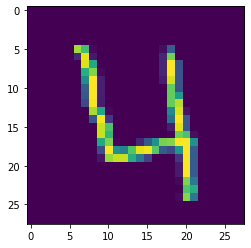

In [29]:
plt.imshow(data.iloc[3,1:].values.reshape(28,28))

In [30]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [31]:
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=2)

In [33]:
X_train.shape

(33600, 784)

In [34]:
y_train.shape

(33600,)

In [35]:
y_train = y_train.values.reshape(-1,1)
y_val = y_val.values.reshape(-1,1)

In [36]:
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')
y_train = ohe.fit_transform(y_train)
y_val = ohe.transform(y_val)

In [38]:
y_train.shape

(33600, 10)

In [50]:
def acc_evaluation(model,X,y):
    eva = model.evaluate(X,y)
    return np.round(eva[1]*100,2)

def loss_evaluation(model,X,y):
    eva = model.evaluate(X,y)
    return np.round(eva[0],5)

In [51]:
accuracies = []
losses = []

In [41]:
classifier = Sequential()

classifier.add(Dense(16,activation='relu'))
classifier.add(Dropout(0.1))
classifier.add(BatchNormalization())

classifier.add(Dense(16,activation='relu'))
classifier.add(Dropout(0.1))
classifier.add(BatchNormalization())

classifier.add(Dense(10,activation='sigmoid'))

In [45]:
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [46]:
model_run =  classifier.fit(X_train,y_train,epochs=100,validation_split=0.2,validation_data=(X_val,y_val))

Epoch 1/100
840/840 [==============================] - 4s 3ms/step - loss: 0.9013 - accuracy: 0.7262 - val_loss: 0.3771 - val_accuracy: 0.8981
Epoch 2/100
840/840 [==============================] - 2s 2ms/step - loss: 0.5221 - accuracy: 0.8436 - val_loss: 0.2900 - val_accuracy: 0.9186
Epoch 3/100
840/840 [==============================] - 2s 2ms/step - loss: 0.4475 - accuracy: 0.8672 - val_loss: 0.3049 - val_accuracy: 0.9065
Epoch 4/100
840/840 [==============================] - 2s 2ms/step - loss: 0.4230 - accuracy: 0.8741 - val_loss: 0.2443 - val_accuracy: 0.9284
Epoch 5/100
840/840 [==============================] - 2s 2ms/step - loss: 0.3971 - accuracy: 0.8815 - val_loss: 0.2576 - val_accuracy: 0.9241
Epoch 6/100
840/840 [==============================] - 2s 2ms/step - loss: 0.3854 - accuracy: 0.8852 - val_loss: 0.2556 - val_accuracy: 0.9226
Epoch 7/100
840/840 [==============================] - 2s 2ms/step - loss: 0.3774 - accuracy: 0.8866 - val_loss: 0.2391 - val_accuracy: 0.9277

Epoch 58/100
840/840 [==============================] - 2s 2ms/step - loss: 0.2737 - accuracy: 0.9176 - val_loss: 0.2110 - val_accuracy: 0.9385
Epoch 59/100
840/840 [==============================] - 2s 2ms/step - loss: 0.2730 - accuracy: 0.9184 - val_loss: 0.2122 - val_accuracy: 0.9371
Epoch 60/100
840/840 [==============================] - 2s 2ms/step - loss: 0.2726 - accuracy: 0.9154 - val_loss: 0.2157 - val_accuracy: 0.9365
Epoch 61/100
840/840 [==============================] - 2s 2ms/step - loss: 0.2701 - accuracy: 0.9174 - val_loss: 0.2089 - val_accuracy: 0.9371
Epoch 62/100
840/840 [==============================] - 2s 2ms/step - loss: 0.2615 - accuracy: 0.9189 - val_loss: 0.2081 - val_accuracy: 0.9382
Epoch 63/100
840/840 [==============================] - 2s 2ms/step - loss: 0.2736 - accuracy: 0.9155 - val_loss: 0.2071 - val_accuracy: 0.9400
Epoch 64/100
840/840 [==============================] - 2s 2ms/step - loss: 0.2720 - accuracy: 0.9180 - val_loss: 0.2045 - val_accuracy:

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Accuracy')

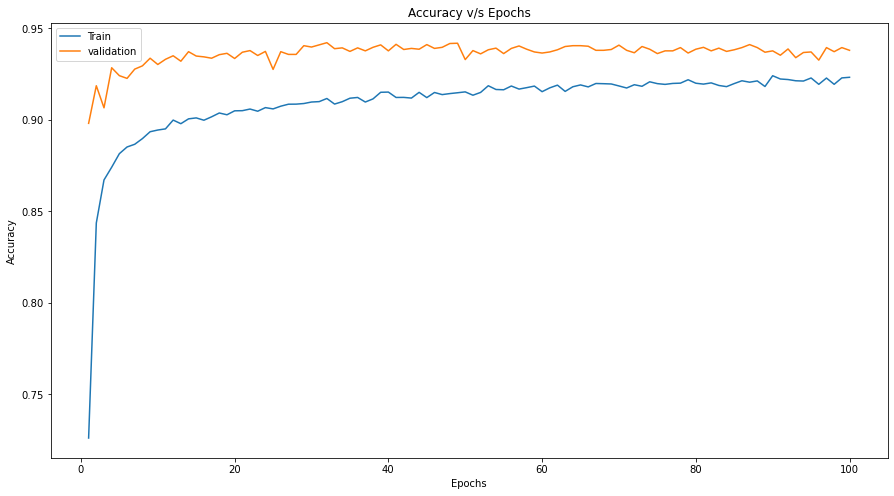

In [47]:
plt.figure(figsize=(15,8))
epochs = range(1,101)
train_accuracy = model_run.history['accuracy']
val_accuracy = model_run.history['val_accuracy']
sns.lineplot(epochs, train_accuracy, label ='Train',linewidth=1.5)
sns.lineplot(epochs, val_accuracy, label ='validation',linewidth=1.5)
plt.title('Accuracy v/s Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Loss')

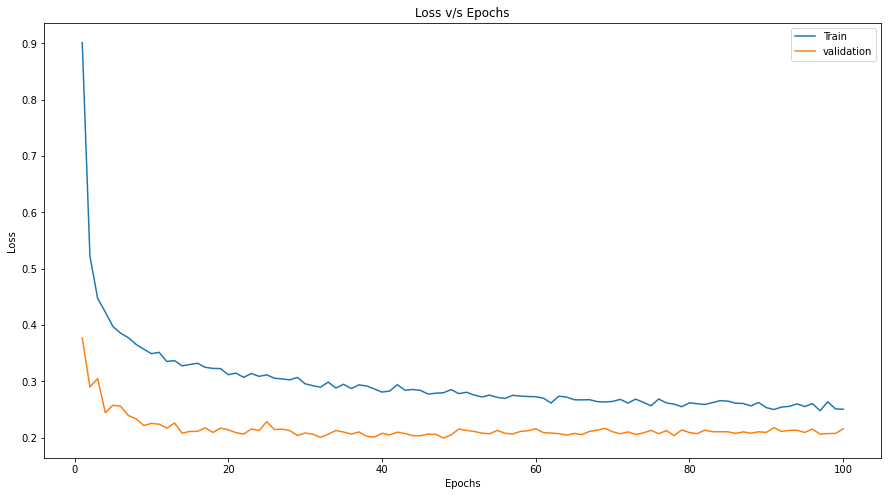

In [48]:
plt.figure(figsize=(15,8))
epochs = range(1,101)
train_loss = model_run.history['loss']
val_loss = model_run.history['val_loss']
sns.lineplot(epochs, train_loss, label ='Train',linewidth=1.5)
sns.lineplot(epochs, val_loss, label ='validation',linewidth=1.5)
plt.title('Loss v/s Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [52]:
accuracies.append(acc_evaluation(classifier,X_val,y_val))
losses.append(loss_evaluation(classifier,X_val,y_val))

263/263 [==============================] - 1s 2ms/step - loss: 0.2304 - accuracy: 0.9369


In [53]:
classifier2 = Sequential()

classifier2.add(Dense(16,activation='relu'))
classifier2.add(BatchNormalization())

classifier2.add(Dense(16,activation='relu'))
classifier2.add(BatchNormalization())

classifier2.add(Dense(10,activation='sigmoid'))

In [55]:
classifier2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [56]:
model_run2 =  classifier2.fit(X_train,y_train,epochs=100,validation_split=0.2,validation_data=(X_val,y_val))

Epoch 1/100
840/840 [==============================] - 3s 2ms/step - loss: 0.6580 - accuracy: 0.8146 - val_loss: 0.3394 - val_accuracy: 0.9018
Epoch 2/100
840/840 [==============================] - 2s 2ms/step - loss: 0.3183 - accuracy: 0.9074 - val_loss: 0.2385 - val_accuracy: 0.9263
Epoch 3/100
840/840 [==============================] - 2s 2ms/step - loss: 0.2702 - accuracy: 0.9206 - val_loss: 0.2173 - val_accuracy: 0.9356
Epoch 4/100
840/840 [==============================] - 2s 2ms/step - loss: 0.2370 - accuracy: 0.9291 - val_loss: 0.2276 - val_accuracy: 0.9330
Epoch 5/100
840/840 [==============================] - 2s 2ms/step - loss: 0.2228 - accuracy: 0.9328 - val_loss: 0.2145 - val_accuracy: 0.9342
Epoch 6/100
840/840 [==============================] - 2s 2ms/step - loss: 0.2029 - accuracy: 0.9385 - val_loss: 0.1993 - val_accuracy: 0.9378
Epoch 7/100
840/840 [==============================] - 2s 3ms/step - loss: 0.1895 - accuracy: 0.9420 - val_loss: 0.1889 - val_accuracy: 0.9423

Epoch 58/100
840/840 [==============================] - 2s 2ms/step - loss: 0.0839 - accuracy: 0.9717 - val_loss: 0.2086 - val_accuracy: 0.9479
Epoch 59/100
840/840 [==============================] - 2s 2ms/step - loss: 0.0844 - accuracy: 0.9716 - val_loss: 0.2149 - val_accuracy: 0.9473
Epoch 60/100
840/840 [==============================] - 2s 2ms/step - loss: 0.0800 - accuracy: 0.9734 - val_loss: 0.2176 - val_accuracy: 0.9467
Epoch 61/100
840/840 [==============================] - 2s 2ms/step - loss: 0.0801 - accuracy: 0.9725 - val_loss: 0.2142 - val_accuracy: 0.9485
Epoch 62/100
840/840 [==============================] - 2s 2ms/step - loss: 0.0795 - accuracy: 0.9725 - val_loss: 0.2178 - val_accuracy: 0.9469
Epoch 63/100
840/840 [==============================] - 2s 2ms/step - loss: 0.0809 - accuracy: 0.9727 - val_loss: 0.2227 - val_accuracy: 0.9446
Epoch 64/100
840/840 [==============================] - 2s 2ms/step - loss: 0.0786 - accuracy: 0.9733 - val_loss: 0.2332 - val_accuracy:

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Accuracy')

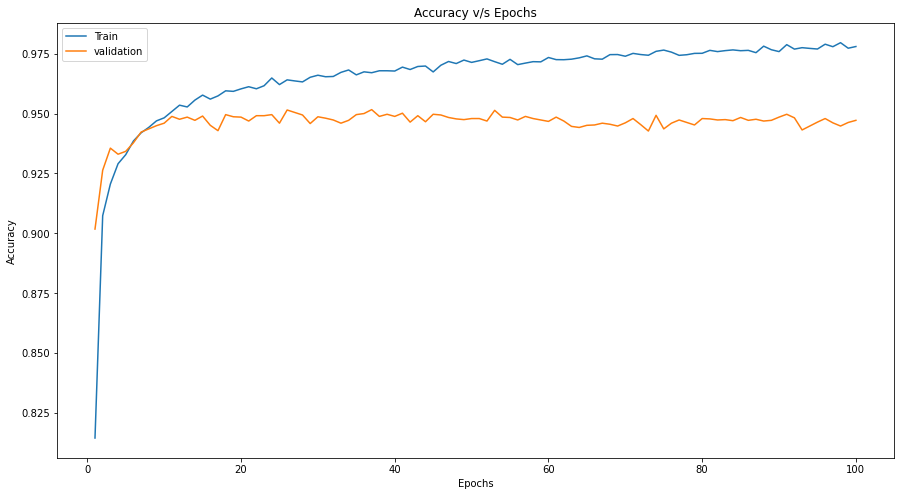

In [57]:
plt.figure(figsize=(15,8))
epochs = range(1,101)
train_accuracy = model_run2.history['accuracy']
val_accuracy = model_run2.history['val_accuracy']
sns.lineplot(epochs, train_accuracy, label ='Train',linewidth=1.5)
sns.lineplot(epochs, val_accuracy, label ='validation',linewidth=1.5)
plt.title('Accuracy v/s Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Loss')

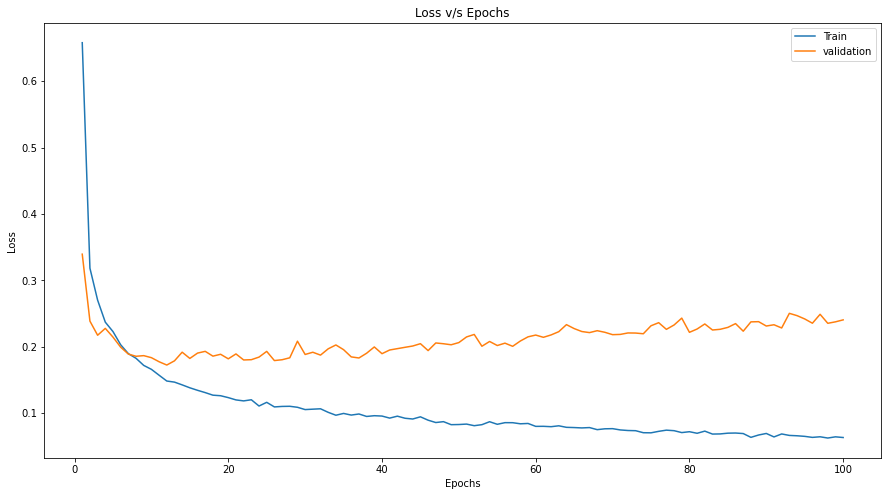

In [58]:
plt.figure(figsize=(15,8))
epochs = range(1,101)
train_loss = model_run2.history['loss']
val_loss = model_run2.history['val_loss']
sns.lineplot(epochs, train_loss, label ='Train',linewidth=1.5)
sns.lineplot(epochs, val_loss, label ='validation',linewidth=1.5)
plt.title('Loss v/s Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [60]:
accuracies.append(acc_evaluation(classifier2,X_val,y_val))
losses.append(loss_evaluation(classifier2,X_val,y_val))

263/263 [==============================] - 0s 2ms/step - loss: 0.2692 - accuracy: 0.9412


In [61]:
classifier3 = Sequential()

classifier3.add(Dense(32,activation='relu'))
classifier3.add(BatchNormalization())

classifier3.add(Dense(16,activation='relu'))
classifier3.add(BatchNormalization())

classifier3.add(Dense(10,activation='sigmoid'))

In [62]:
classifier3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model_run3 =  classifier3.fit(X_train,y_train,epochs=100,validation_split=0.2,validation_data=(X_val,y_val))

Epoch 1/100
840/840 [==============================] - 3s 2ms/step - loss: 0.5566 - accuracy: 0.8438 - val_loss: 0.2420 - val_accuracy: 0.9305
Epoch 2/100
840/840 [==============================] - 2s 2ms/step - loss: 0.2454 - accuracy: 0.9286 - val_loss: 0.1957 - val_accuracy: 0.9400
Epoch 3/100
840/840 [==============================] - 2s 2ms/step - loss: 0.1920 - accuracy: 0.9432 - val_loss: 0.1585 - val_accuracy: 0.9548
Epoch 4/100
840/840 [==============================] - 2s 2ms/step - loss: 0.1588 - accuracy: 0.9523 - val_loss: 0.1609 - val_accuracy: 0.9509
Epoch 5/100
840/840 [==============================] - 2s 2ms/step - loss: 0.1415 - accuracy: 0.9568 - val_loss: 0.1399 - val_accuracy: 0.9579
Epoch 6/100
840/840 [==============================] - 2s 2ms/step - loss: 0.1325 - accuracy: 0.9588 - val_loss: 0.1427 - val_accuracy: 0.9565
Epoch 7/100
840/840 [==============================] - 2s 2ms/step - loss: 0.1156 - accuracy: 0.9623 - val_loss: 0.1372 - val_accuracy: 0.9585

Epoch 58/100
840/840 [==============================] - 2s 2ms/step - loss: 0.0342 - accuracy: 0.9881 - val_loss: 0.1808 - val_accuracy: 0.9626
Epoch 59/100
840/840 [==============================] - 2s 2ms/step - loss: 0.0296 - accuracy: 0.9897 - val_loss: 0.1727 - val_accuracy: 0.9641
Epoch 60/100
840/840 [==============================] - 2s 2ms/step - loss: 0.0289 - accuracy: 0.9901 - val_loss: 0.1911 - val_accuracy: 0.9606
Epoch 61/100
840/840 [==============================] - 2s 2ms/step - loss: 0.0274 - accuracy: 0.9909 - val_loss: 0.1875 - val_accuracy: 0.9616
Epoch 62/100
840/840 [==============================] - 2s 2ms/step - loss: 0.0297 - accuracy: 0.9895 - val_loss: 0.1962 - val_accuracy: 0.9616
Epoch 63/100
840/840 [==============================] - 2s 2ms/step - loss: 0.0316 - accuracy: 0.9897 - val_loss: 0.1881 - val_accuracy: 0.9624
Epoch 64/100
840/840 [==============================] - 2s 2ms/step - loss: 0.0286 - accuracy: 0.9905 - val_loss: 0.1938 - val_accuracy:

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Accuracy')

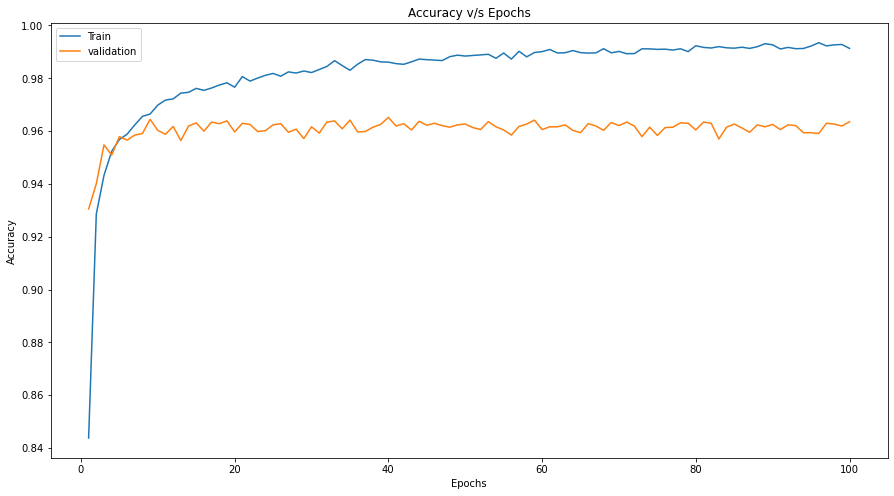

In [63]:
plt.figure(figsize=(15,8))
epochs = range(1,101)
train_accuracy = model_run3.history['accuracy']
val_accuracy = model_run3.history['val_accuracy']
sns.lineplot(epochs, train_accuracy, label ='Train',linewidth=1.5)
sns.lineplot(epochs, val_accuracy, label ='validation',linewidth=1.5)
plt.title('Accuracy v/s Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Loss')

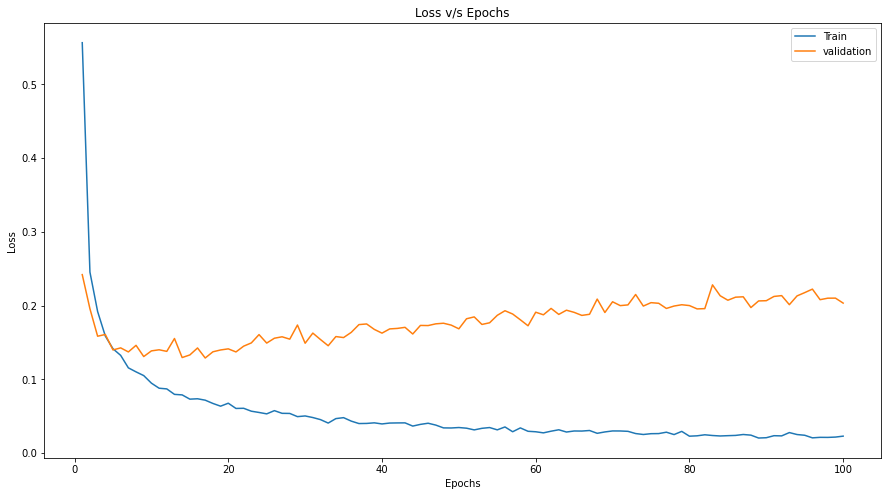

In [64]:
plt.figure(figsize=(15,8))
epochs = range(1,101)
train_loss = model_run3.history['loss']
val_loss = model_run3.history['val_loss']
sns.lineplot(epochs, train_loss, label ='Train',linewidth=1.5)
sns.lineplot(epochs, val_loss, label ='validation',linewidth=1.5)
plt.title('Loss v/s Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [65]:
accuracies.append(acc_evaluation(classifier3,X_val,y_val))
losses.append(loss_evaluation(classifier3,X_val,y_val))

263/263 [==============================] - 1s 2ms/step - loss: 0.2042 - accuracy: 0.9604


In [66]:
classifier4 = Sequential()

classifier4.add(Dense(32,activation='relu'))
classifier4.add(BatchNormalization())

classifier4.add(Dense(32,activation='relu'))
classifier4.add(BatchNormalization())

classifier4.add(Dense(10,activation='sigmoid'))

classifier4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model_run4 =  classifier4.fit(X_train,y_train,epochs=100,validation_split=0.2,validation_data=(X_val,y_val))

Epoch 1/100
840/840 [==============================] - 3s 2ms/step - loss: 0.5013 - accuracy: 0.8547 - val_loss: 0.2426 - val_accuracy: 0.9253
Epoch 2/100
840/840 [==============================] - 2s 2ms/step - loss: 0.2386 - accuracy: 0.9288 - val_loss: 0.1682 - val_accuracy: 0.9478
Epoch 3/100
840/840 [==============================] - 2s 2ms/step - loss: 0.1764 - accuracy: 0.9471 - val_loss: 0.1576 - val_accuracy: 0.9522
Epoch 4/100
840/840 [==============================] - 2s 2ms/step - loss: 0.1471 - accuracy: 0.9544 - val_loss: 0.1318 - val_accuracy: 0.9585
Epoch 5/100
840/840 [==============================] - 2s 2ms/step - loss: 0.1325 - accuracy: 0.9577 - val_loss: 0.1465 - val_accuracy: 0.9542
Epoch 6/100
840/840 [==============================] - 2s 2ms/step - loss: 0.1144 - accuracy: 0.9638 - val_loss: 0.1368 - val_accuracy: 0.9594
Epoch 7/100
840/840 [==============================] - 2s 2ms/step - loss: 0.1039 - accuracy: 0.9658 - val_loss: 0.1379 - val_accuracy: 0.9565

Epoch 58/100
840/840 [==============================] - 2s 2ms/step - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.1669 - val_accuracy: 0.9646
Epoch 59/100
840/840 [==============================] - 2s 2ms/step - loss: 0.0228 - accuracy: 0.9924 - val_loss: 0.1834 - val_accuracy: 0.9624
Epoch 60/100
840/840 [==============================] - 2s 2ms/step - loss: 0.0201 - accuracy: 0.9932 - val_loss: 0.1600 - val_accuracy: 0.9673
Epoch 61/100
840/840 [==============================] - 2s 2ms/step - loss: 0.0210 - accuracy: 0.9921 - val_loss: 0.1684 - val_accuracy: 0.9664
Epoch 62/100
840/840 [==============================] - 2s 2ms/step - loss: 0.0244 - accuracy: 0.9914 - val_loss: 0.1683 - val_accuracy: 0.9653
Epoch 63/100
840/840 [==============================] - 2s 2ms/step - loss: 0.0215 - accuracy: 0.9923 - val_loss: 0.1662 - val_accuracy: 0.9658
Epoch 64/100
840/840 [==============================] - 2s 2ms/step - loss: 0.0196 - accuracy: 0.9932 - val_loss: 0.1756 - val_accuracy:

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Accuracy')

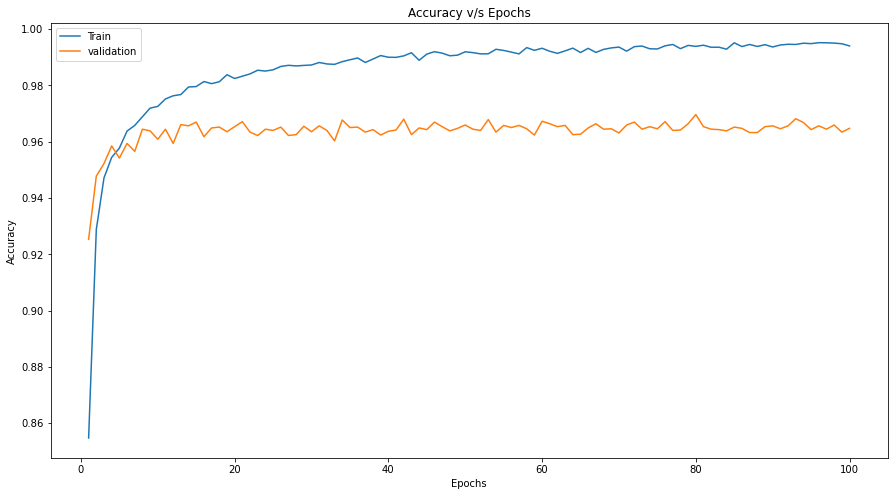

In [67]:
plt.figure(figsize=(15,8))
epochs = range(1,101)
train_accuracy = model_run4.history['accuracy']
val_accuracy = model_run4.history['val_accuracy']
sns.lineplot(epochs, train_accuracy, label ='Train',linewidth=1.5)
sns.lineplot(epochs, val_accuracy, label ='validation',linewidth=1.5)
plt.title('Accuracy v/s Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Loss')

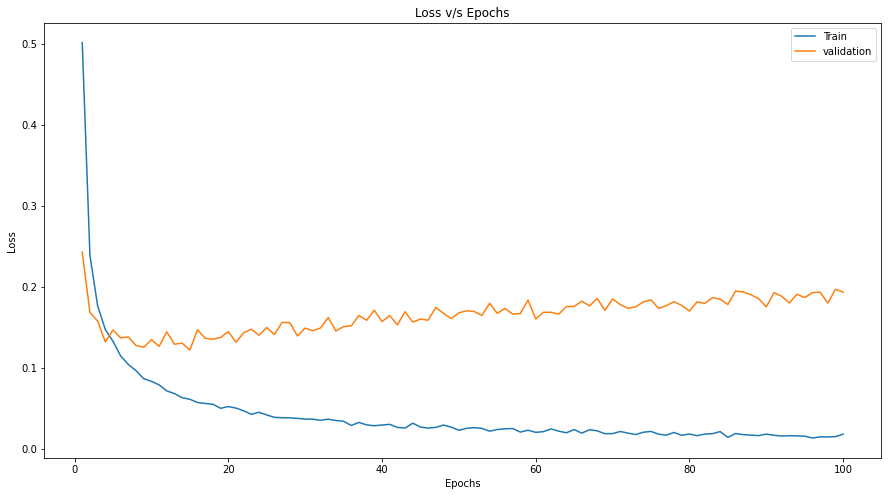

In [68]:
plt.figure(figsize=(15,8))
epochs = range(1,101)
train_loss = model_run4.history['loss']
val_loss = model_run4.history['val_loss']
sns.lineplot(epochs, train_loss, label ='Train',linewidth=1.5)
sns.lineplot(epochs, val_loss, label ='validation',linewidth=1.5)
plt.title('Loss v/s Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [69]:
accuracies.append(acc_evaluation(classifier4,X_val,y_val))
losses.append(loss_evaluation(classifier4,X_val,y_val))

263/263 [==============================] - 1s 2ms/step - loss: 0.2065 - accuracy: 0.9631


In [117]:
classifier5 = Sequential()

classifier5.add(Dense(128,activation='relu'))
classifier5.add(BatchNormalization())

classifier5.add(Dense(32,activation='relu'))
classifier5.add(BatchNormalization())

classifier5.add(Dense(10,activation='softmax'))

classifier5.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model_run5 =  classifier5.fit(X_train,y_train,epochs=100,validation_split=0.2,validation_data=(X_val,y_val))

Epoch 1/100
840/840 [==============================] - 4s 3ms/step - loss: 0.3790 - accuracy: 0.8956 - val_loss: 0.1965 - val_accuracy: 0.9442
Epoch 2/100
840/840 [==============================] - 2s 3ms/step - loss: 0.1660 - accuracy: 0.9502 - val_loss: 0.1349 - val_accuracy: 0.9626
Epoch 3/100
840/840 [==============================] - 2s 3ms/step - loss: 0.1172 - accuracy: 0.9651 - val_loss: 0.1231 - val_accuracy: 0.9626
Epoch 4/100
840/840 [==============================] - 2s 3ms/step - loss: 0.0918 - accuracy: 0.9712 - val_loss: 0.1269 - val_accuracy: 0.9647
Epoch 5/100
840/840 [==============================] - 2s 3ms/step - loss: 0.0770 - accuracy: 0.9767 - val_loss: 0.1208 - val_accuracy: 0.9676
Epoch 6/100
840/840 [==============================] - 2s 3ms/step - loss: 0.0621 - accuracy: 0.9808 - val_loss: 0.1094 - val_accuracy: 0.9704
Epoch 7/100
840/840 [==============================] - 2s 3ms/step - loss: 0.0586 - accuracy: 0.9810 - val_loss: 0.1276 - val_accuracy: 0.9689

Epoch 58/100
840/840 [==============================] - 2s 3ms/step - loss: 0.0074 - accuracy: 0.9977 - val_loss: 0.1628 - val_accuracy: 0.9737
Epoch 59/100
840/840 [==============================] - 2s 3ms/step - loss: 0.0094 - accuracy: 0.9970 - val_loss: 0.1613 - val_accuracy: 0.9753
Epoch 60/100
840/840 [==============================] - 2s 2ms/step - loss: 0.0076 - accuracy: 0.9972 - val_loss: 0.1731 - val_accuracy: 0.9734
Epoch 61/100
840/840 [==============================] - 2s 3ms/step - loss: 0.0078 - accuracy: 0.9975 - val_loss: 0.1754 - val_accuracy: 0.9722
Epoch 62/100
840/840 [==============================] - 2s 3ms/step - loss: 0.0083 - accuracy: 0.9974 - val_loss: 0.1759 - val_accuracy: 0.9749
Epoch 63/100
840/840 [==============================] - 3s 3ms/step - loss: 0.0096 - accuracy: 0.9966 - val_loss: 0.1928 - val_accuracy: 0.9725
Epoch 64/100
840/840 [==============================] - 2s 3ms/step - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.1840 - val_accuracy:

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Accuracy')

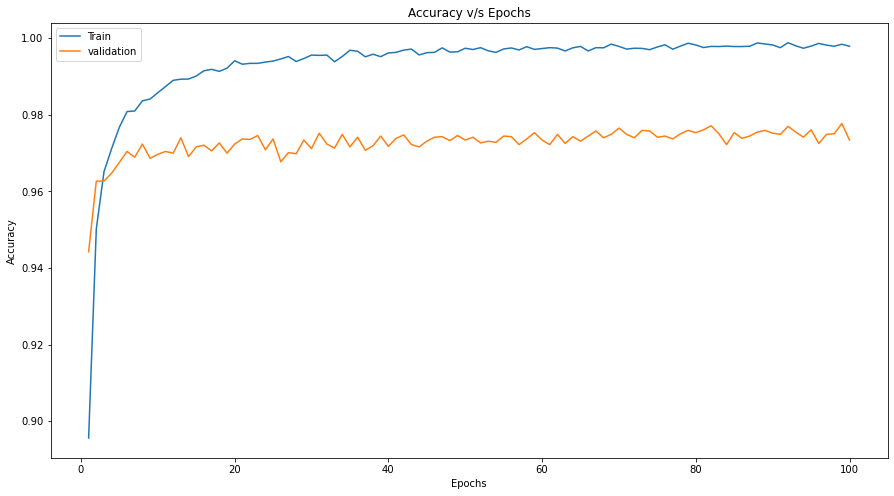

In [118]:
plt.figure(figsize=(15,8))
epochs = range(1,101)
train_accuracy = model_run5.history['accuracy']
val_accuracy = model_run5.history['val_accuracy']
sns.lineplot(epochs, train_accuracy, label ='Train',linewidth=1.5)
sns.lineplot(epochs, val_accuracy, label ='validation',linewidth=1.5)
plt.title('Accuracy v/s Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Loss')

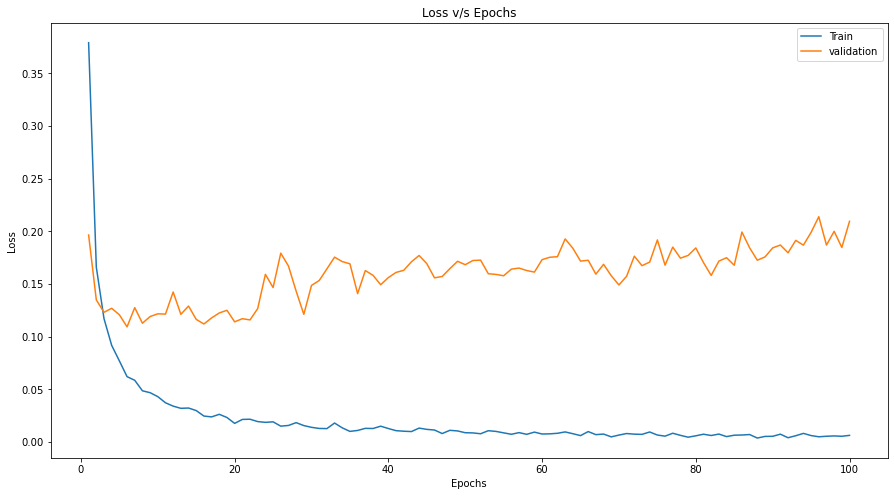

In [119]:
plt.figure(figsize=(15,8))
epochs = range(1,101)
train_loss = model_run5.history['loss']
val_loss = model_run5.history['val_loss']
sns.lineplot(epochs, train_loss, label ='Train',linewidth=1.5)
sns.lineplot(epochs, val_loss, label ='validation',linewidth=1.5)
plt.title('Loss v/s Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [120]:
accuracies.append(acc_evaluation(classifier5,X_val,y_val))
losses.append(loss_evaluation(classifier5,X_val,y_val))

263/263 [==============================] - 1s 2ms/step - loss: 0.1691 - accuracy: 0.9731


In [70]:
test = pd.read_csv('data/digit-recognizer/test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
def check_res(x):
    plt.title('Actual Output')
    plt.imshow(test.iloc[x,:].values.reshape(28,28))
    y_pred = classifier.predict(test.iloc[x,:].values.reshape(1,-1))
    y_pred2 = classifier2.predict(test.iloc[x,:].values.reshape(1,-1))
    y_pred3 = classifier3.predict(test.iloc[x,:].values.reshape(1,-1))
    y_pred4 = classifier4.predict(test.iloc[x,:].values.reshape(1,-1))
    y_pred5 = classifier5.predict(test.iloc[x,:].values.reshape(1,-1))
    print('prediction of classifier 1 :',y_pred.argmax(axis=1)[0])
    print('prediction of classifier 2 :',y_pred2.argmax(axis=1)[0])
    print('prediction of classifier 3 :',y_pred3.argmax(axis=1)[0])
    print('prediction of classifier 4 :',y_pred4.argmax(axis=1)[0])
    print('prediction of classifier 5 :',y_pred5.argmax(axis=1)[0])

prediction of classifier 1 : 5
prediction of classifier 2 : 5
prediction of classifier 3 : 5
prediction of classifier 4 : 5
prediction of classifier 5 : 5


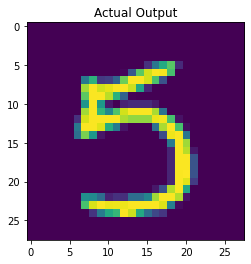

In [122]:
check_res(432)

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


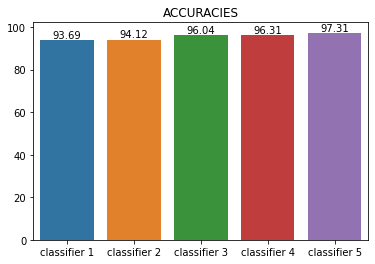

In [123]:
plt.title('ACCURACIES')
ax = sns.barplot(['classifier 1','classifier 2','classifier 3','classifier 4','classifier 5'],accuracies)
ax.bar_label(ax.containers[0]);

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


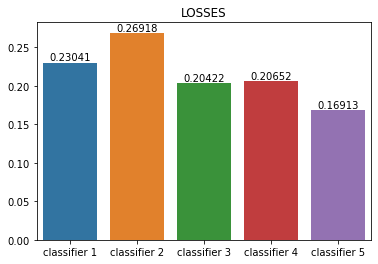

In [124]:
plt.title('LOSSES')
ax = sns.barplot(['classifier 1','classifier 2','classifier 3','classifier 4','classifier 5'],losses)
ax.bar_label(ax.containers[0]);